# Unit 5 - Financial Planning

In [245]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [246]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [247]:
# Set current amount of crypto assets
tickers_crypto = ['BTC', 'ETH']
my_btc = 1.2
my_eth = 5.3

    #create a df
df_crypto = pd.DataFrame()
df_crypto['Assets'] = tickers_crypto
df_crypto['Amount'] = my_btc, my_eth

print(df_crypto)

  Assets  Amount
0    BTC     1.2
1    ETH     5.3


In [248]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [249]:
import json
# Fetch current BTC price
btc = requests.get(btc_url) #call api data
btc.content
btcdata = btc.json()
    #print(json.dumps(btcdata, indent=4)) use json to identify the format of data
btc_price = btcdata['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth = requests.get(eth_url)
eth.content
ethdata = eth.json()
    #print(json.dumps(ethdata, indent=4))
eth_price = ethdata['data']['1027']['quotes']['USD']['price']

#adding prices to dataframe. 
df_crypto['Price'] = btc_price, eth_price

# Compute current value of my crypto (price times amount)
my_btc_value = (btc_price)*(my_btc)
my_eth_value = (eth_price)*(my_eth)
my_crypto = my_btc_value + my_eth_value

#adding values of holdings to df 
df_crypto['Value'] = [my_btc_value, my_eth_value]

# Print current crypto wallet balance
print(f"The total crypto wallet balance is {my_crypto}")

print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

df_crypto

The total crypto wallet balance is 64195.709
The current value of your 1.2 BTC is $49029.60
The current value of your 5.3 ETH is $15166.11


,Assets,Amount,Price,Value
0,BTC,1.2,40858.00,49029.600
1,ETH,5.3,2861.53,15166.109


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [250]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [251]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("APCA_API_KEY_ID")#ALPACA_API_KEY
alpaca_secret_key = os.getenv("APCA_API_SECRET_KEY")#ALPACA_SECRET_KEY


# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)
print(type(alpaca_api_key))

<class 'str'>


In [252]:
#using get_bars, and getting the stocks data
from alpaca_trade_api.rest import REST, TimeFrame
api = REST()

agg_df = api.get_bars(["AGG"], TimeFrame.Day, "2022-02-17", "2022-03-17").df
agg_df.rename(columns = {"close": "AGG_close"}, inplace=True)

spy_df = api.get_bars(["SPY"], TimeFrame.Day, "2022-02-17", "2022-03-17").df
spy_df.rename(columns = {"close": "SPY_close"}, inplace=True)

agg_df.head()

,open,high,low,AGG_close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-02-17 05:00:00+00:00,109.560,109.8050,109.5146,109.64,9807695,25959,109.652013,AGG
2022-02-18 05:00:00+00:00,109.830,109.8800,109.7100,109.87,6896731,20755,109.811675,AGG
2022-02-22 05:00:00+00:00,109.680,109.7800,109.5650,109.75,6925944,21241,109.684022,AGG
2022-02-23 05:00:00+00:00,109.525,109.5500,109.2300,109.26,10990618,24439,109.388778,AGG
2022-02-24 05:00:00+00:00,109.670,109.7681,109.1700,109.46,12371968,36217,109.528219,AGG


In [253]:
df_stocks = pd.concat([agg_df, spy_df], axis=1) #concat stovks into 1 df
df_stocks.head(5) #check format

,open,high,low,AGG_close,volume,trade_count,vwap,symbol,open,high,low,SPY_close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,,,,,,,,,
2022-02-17 05:00:00+00:00,109.560,109.8050,109.5146,109.64,9807695,25959,109.652013,AGG,443.42,446.5652,436.42,437.06,96723839,824571,440.088813,SPY
2022-02-18 05:00:00+00:00,109.830,109.8800,109.7100,109.87,6896731,20755,109.811675,AGG,437.38,438.6600,431.82,434.23,127857744,1101247,435.262307,SPY
2022-02-22 05:00:00+00:00,109.680,109.7800,109.5650,109.75,6925944,21241,109.684022,AGG,431.99,435.5000,425.86,429.57,120256973,1169538,430.723141,SPY
2022-02-23 05:00:00+00:00,109.525,109.5500,109.2300,109.26,10990618,24439,109.388778,AGG,432.62,433.2600,421.35,421.95,125417608,1112641,426.017915,SPY
2022-02-24 05:00:00+00:00,109.670,109.7681,109.1700,109.46,12371968,36217,109.528219,AGG,411.01,428.7600,410.64,427.99,213249029,2310796,419.738184,SPY


In [255]:
# Pick AGG and SPY close prices
agg_close_price = df_stocks["AGG_close"] #calling just the close column
spy_close_price = df_stocks["SPY_close"]
#print(spy_close_price.head())
agg_close_price = agg_close_price[-1] #calling the last closing price by index -1
spy_close_price = spy_close_price[-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $107.86
Current SPY closing price: $441.07


In [256]:
# Compute the current value of shares
my_agg_value = (my_agg)*(agg_close_price)
my_spy_value = (my_spy)*(spy_close_price)

total_share_value = (my_spy_value) + (my_agg_value)

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

print(f"The total current value of your shares is ${total_share_value:0.2f}") #added this so you can see the total value of  shares

The current value of your 50 SPY shares is $22053.50
The current value of your 200 AGG shares is $21572.00
The total current value of your shares is $43625.50


### Savings Health Analysis

In [329]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
df_savings = pd.DataFrame(columns=['Name', 'Price', 'Value'])

df_savings['Name'] = ['BTC', 'ETH', 'AGG', 'SPY'] #under column Name make rows of each asset

#adding current prices
df_savings['Price'].iloc[0] = btc_price
df_savings['Price'].iloc[1] = eth_price

df_savings['Price'].iloc[2] = agg_close_price
df_savings['Price'].iloc[3] = spy_close_price


#adding crypto values
df_savings['Value'].iloc[0] = my_btc_value
df_savings['Value'].iloc[1] = my_eth_value

df_savings['Value'].iloc[2] = my_agg_value
df_savings['Value'].iloc[3] = my_spy_value

#reset index to the names
df_savings = df_savings.set_index('Name')

# Display savings DataFrame
display(df_savings)

,Price,Value
Name,,
BTC,40858.0,49029.6
ETH,2861.53,15166.109
AGG,107.86,21572.0
SPY,441.07,22053.5


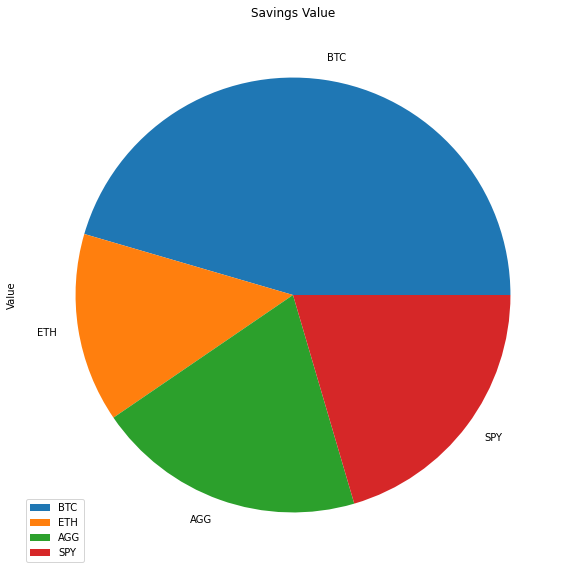

In [258]:
# Plot savings pie chart
#if you have darkmode on you wont be able to view the messages because the text is black
savings_plot = df_savings.plot.pie(y='Value', figsize=(10, 10), title='Savings Value')

In [325]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_value_savings = df_savings['Value'].sum() 

#printed total savings and emergency fund for better understanding and to verify the if statements are working correctly
print(f'Total savings: ${total_value_savings:0.2f}, emergency fund target is ${emergency_fund}')
 #add ':0.2f' to round of numbers into cents
# Validate saving health
if total_value_savings == emergency_fund:
    print('You have reached your finacial goal of an ideal emergency fund')

elif total_value_savings > emergency_fund:
    print('Congratulations you have enough savings for a sufficient emergency fund')

elif total_value_savings < emergency_fund:
    left = emergency_fund - total_value_savings
    print(f'You are ${left} away from reaching your ideal emergency fund')


Total savings: $107821.21, emergency fund target is $36000
Congratulations you have enough savings for a sufficient emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [260]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-03-16', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-03-16', tz='America/New_York').isoformat()

#i think this part is irrelevant with the new get_bars format instead of old barset

In [316]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
agg_5df = api.get_bars(["AGG"], TimeFrame.Day, "2017-02-17", "2022-03-17").df

spy_5df = api.get_bars(["SPY"], TimeFrame.Day, "2017-02-17", "2022-03-17").df

five_yr_stocks = pd.concat([agg_5df, spy_5df], keys=['AGG', 'SPY'], axis=1, join='inner') #creating keys for each stock etc
five_yr_stocks.head()

# Display savings DataFrame
display(five_yr_stocks)

AGG                                       \
                             open     high       low   close    volume   
timestamp                                                                
2017-02-17 05:00:00+00:00  108.37  108.445  108.3200  108.36   2228261   
2017-02-21 05:00:00+00:00  108.24  108.450  108.2200  108.35   1980343   
2017-02-22 05:00:00+00:00  108.54  108.550  108.2000  108.42   2655460   
2017-02-23 05:00:00+00:00  108.56  108.645  108.5338  108.60   2168995   
2017-02-24 05:00:00+00:00  108.88  109.060  108.8200  109.00   2670884   
...                           ...      ...       ...     ...       ...   
2022-03-11 05:00:00+00:00  108.44  108.550  108.3400  108.41  10662625   
2022-03-14 04:00:00+00:00  107.78  107.816  107.3600  107.36   9492508   
2022-03-15 04:00:00+00:00  107.83  107.920  107.4300  107.60  13841071   
2022-03-16 04:00:00+00:00  107.63  107.730  107.0032  107.68  15809171   
2022-03-17 04:00:00+00:00  107.87  108.060  107.7300  107.86   8005258   

                                                              SPY            \
                          trade_count        vwap symbol     open      high   
timestamp                                                                     
2017-02-17 05:00:00+00:00        9631  108.362515    AGG  233.970  235.0900   
2017-02-21 05:00:00+00:00       12797  108.341822    AGG  235.540  236.6900   
2017-02-22 05:00:00+00:00       12788  108.369679    AGG  236.020  236.5400   
2017-02-23 05:00:00+00:00        9730  108.596026    AGG  236.890  236.9000   
2017-02-24 05:00:00+00:00       11337  108.976609    AGG  235.420  236.7932   
...                               ...         ...    ...      ...       ...   
2022-03-11 05:00:00+00:00       29475  108.421874    AGG  428.180  428.7700   
2022-03-14 04:00:00+00:00       34364  107.571987    AGG  420.975  424.5500   
2022-03-15 04:00:00+00:00       33852  107.622094    AGG  419.900  426.8400   
2022-03-16 04:00:00+00:00       43366  107.553629    AGG  429.940  435.6800   
2022-03-17 04:00:00+00:00       24093  107.889900    AGG  433.700  441.0700   

                                                                              \
                              low   close     volume trade_count        vwap   
timestamp                                                                      
2017-02-17 05:00:00+00:00  233.93  235.04   77204104      207252  234.568370   
2017-02-21 05:00:00+00:00  235.51  236.44   88946051      233903  236.250662   
2017-02-22 05:00:00+00:00  235.83  236.29   62115185      180551  236.280048   
2017-02-23 05:00:00+00:00  235.56  236.44   74594902      258686  236.330804   
2017-02-24 05:00:00+00:00  235.41  236.77   82381612      263740  236.213674   
...                           ...     ...        ...         ...         ...   
2022-03-11 05:00:00+00:00  419.53  420.07   90803923      809145  424.040193   
2022-03-14 04:00:00+00:00  415.79  417.00   91930409      863515  419.203845   
2022-03-15 04:00:00+00:00  418.42  426.17  104219651      920659  422.752423   
2022-03-16 04:00:00+00:00  424.80  435.62  138130298     1344164  431.339744   
2022-03-17 04:00:00+00:00  433.19  441.07  100157174      784018  437.706981   

                                  
                          symbol  
timestamp                         
2017-02-17 05:00:00+00:00    SPY  
2017-02-21 05:00:00+00:00    SPY  
2017-02-22 05:00:00+00:00    SPY  
2017-02-23 05:00:00+00:00    SPY  
2017-02-24 05:00:00+00:00    SPY  
...                          ...  
2022-03-11 05:00:00+00:00    SPY  
2022-03-14 04:00:00+00:00    SPY  
2022-03-15 04:00:00+00:00    SPY  
2022-03-16 04:00:00+00:00    SPY  
2022-03-17 04:00:00+00:00    SPY  

[1279 rows x 16 columns]

In [317]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_30yr = MCSimulation(
    portfolio_data = five_yr_stocks,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [318]:
# Printing the simulation input data
print(mc_30yr.portfolio_data.head())

                              AGG                                      \
                             open     high       low   close   volume   
timestamp                                                               
2017-02-17 05:00:00+00:00  108.37  108.445  108.3200  108.36  2228261   
2017-02-21 05:00:00+00:00  108.24  108.450  108.2200  108.35  1980343   
2017-02-22 05:00:00+00:00  108.54  108.550  108.2000  108.42  2655460   
2017-02-23 05:00:00+00:00  108.56  108.645  108.5338  108.60  2168995   
2017-02-24 05:00:00+00:00  108.88  109.060  108.8200  109.00  2670884   

                                                                          SPY  \
                          trade_count        vwap symbol daily_return    open   
timestamp                                                                       
2017-02-17 05:00:00+00:00        9631  108.362515    AGG          NaN  233.97   
2017-02-21 05:00:00+00:00       12797  108.341822    AGG    -0.000092  235.54   
2017-02-22

In [319]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_30yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/keanumanson/Desktop/HomeWork/apis-homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004074,0.994494,1.003205,1.014491,0.986494,0.995563,0.996236,1.000740,1.001289,0.996225,...,1.010206,0.997187,1.006348,1.004825,0.999246,0.999990,1.019975,0.998896,0.994083,1.000299
2,1.004012,0.998585,1.018953,1.017314,0.996509,0.999226,0.998092,1.005912,1.003128,0.998368,...,1.005463,0.993858,1.007142,1.000410,0.999650,1.012194,1.017765,1.007482,0.993730,1.006511
3,1.011449,0.988831,1.018917,1.020173,1.008005,0.994540,1.006090,1.008743,1.015306,0.999955,...,1.013842,1.003506,1.017799,0.991038,1.001652,1.011451,1.020574,1.003344,0.993631,1.010296
4,1.014995,0.998525,1.016067,1.023773,1.014611,1.003483,1.013830,1.007676,1.019320,0.999148,...,1.016211,1.001282,1.014734,0.992810,1.002439,1.016169,1.024374,1.012227,0.997724,1.009764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,31.882262,9.544533,9.235610,13.231770,18.045788,8.768872,46.848143,7.382679,3.157034,11.076780,...,2.902059,19.580073,13.068632,7.226790,3.108081,17.745364,5.641543,6.371452,31.572138,18.816464
7557,32.487154,9.577095,9.190579,13.232859,17.714614,8.789262,46.766499,7.424388,3.163429,11.148243,...,2.924299,19.442608,13.202471,7.172731,3.116261,17.759638,5.577659,6.323798,31.238470,18.791545
7558,32.644448,9.571180,9.305988,13.012599,17.621463,8.742459,46.977312,7.425132,3.161738,11.242754,...,2.912302,19.453021,13.160755,7.193515,3.083397,17.805766,5.599580,6.376291,31.645977,18.714727
7559,32.735774,9.533270,9.236459,13.026525,17.635278,8.754839,46.703949,7.368174,3.116403,11.257301,...,2.881753,19.569183,13.202595,7.257216,3.117227,17.847385,5.627054,6.355938,31.597585,18.421629


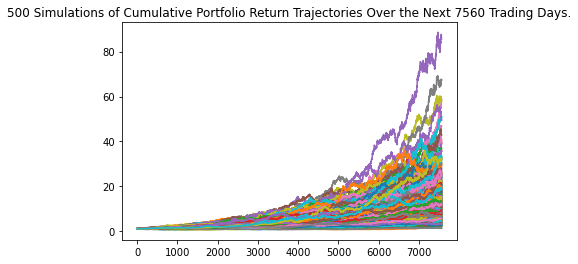

In [320]:
# Plot simulation outcomes
line_plot = mc_30yr.plot_simulation()

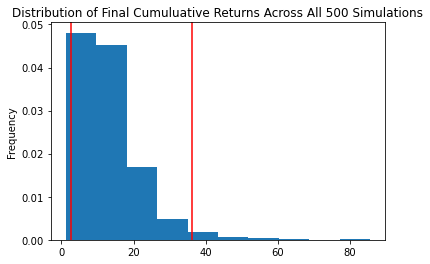

In [321]:
# Plot probability distribution and confidence intervals
dist_plot = mc_30yr.plot_distribution()

### Retirement Analysis

In [322]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_sum = mc_30yr.summarize_cumulative_return()
# Print summary statistics
print(mc_sum)

print(mc_sum[8])
print(mc_sum[9])

count           500.000000
mean             13.375051
std               9.467522
min               1.213355
25%               7.131318
50%              11.371350
75%              16.870453
max              85.657041
95% CI Lower      2.734527
95% CI Upper     36.316064
Name: 7560, dtype: float64
2.7345267752099276
36.31606380221382


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [326]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

ci_lower = mc_sum[8]*initial_investment #round these off to 0.00? like above
ci_upper = mc_sum[9]*initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:0.2f} and ${ci_upper:0.2f}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $54690.54 and $726321.28


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [327]:
# Set initial investment
initial_investment = 20000*1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_50increase = mc_sum[8]*initial_investment
ci_upper_50increase = mc_sum[9]*initial_investment


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_50increase:0.2f} and ${ci_upper_50increase:0.2f}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $82035.80 and $1089481.91


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [305]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

#i was going to do the optional challenge, but the alpaca get_bars/set_bars change took up extra time :( 

In [306]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns


In [307]:
# Plot simulation outcomes


In [308]:
# Plot probability distribution and confidence intervals


In [309]:
# Fetch summary statistics from the Monte Carlo simulation results

# Print summary statistics


In [310]:
# Set initial investment

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results


### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results


In [ ]:
##